In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os

%matplotlib inline

Welcome to JupyROOT 6.12/06


Let's get the versions numbers we want to create comparison plots of. These should have already had all of the plots generated using the productionFeedback module.

In [2]:
versionNumbers = ["v9_11_00","v9_16_01"]
versionPaths = ["./images/"+x+"/" for x in versionNumbers]
print(versionNumbers)

['v9_11_00', 'v9_16_01']


Lets first look at the farlineHistograms canvas

In [3]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_farlineHistograms.root")
    f.ls()
    c = f.Get("c")
#    c.Draw()
    prims = list(c.GetListOfPrimitives())
    for x in prims:
        #print(list(x.GetListOfPrimitives())[1])
        h = list(x.GetListOfPrimitives())[1].Clone()
        h.SetDirectory(0)
        histVec.append(h)
        print(h)
    
    f.Close()
print(histVec)

./images/v9_11_00/
<ROOT.TH1D object ("allCaloEnergies") at 0x7fffef872950>
<ROOT.TH1D object ("allCaloWiggle") at 0x7fffef874890>
<ROOT.TH1D object ("allCaloTimes") at 0x7fffef869910>
<ROOT.TH1D object ("farlineCTag") at 0x7fffef883960>
./images/v9_16_01/
<ROOT.TH1D object ("allCaloEnergies") at 0x7fffef88fcd0>
<ROOT.TH1D object ("allCaloWiggle") at 0x7fffef86db20>
<ROOT.TH1D object ("allCaloTimes") at 0x7fffef86df10>
<ROOT.TH1D object ("farlineCTag") at 0x7fffef872f00>
[<ROOT.TH1D object ("allCaloEnergies") at 0x7fffef872950>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffef874890>, <ROOT.TH1D object ("allCaloTimes") at 0x7fffef869910>, <ROOT.TH1D object ("farlineCTag") at 0x7fffef883960>, <ROOT.TH1D object ("allCaloEnergies") at 0x7fffef88fcd0>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffef86db20>, <ROOT.TH1D object ("allCaloTimes") at 0x7fffef86df10>, <ROOT.TH1D object ("farlineCTag") at 0x7fffef872f00>]
TFile**		./images/v9_11_00/v9_11_00_farlineHistograms.root	
 TFile*		./images

v9_11_00
v9_16_01


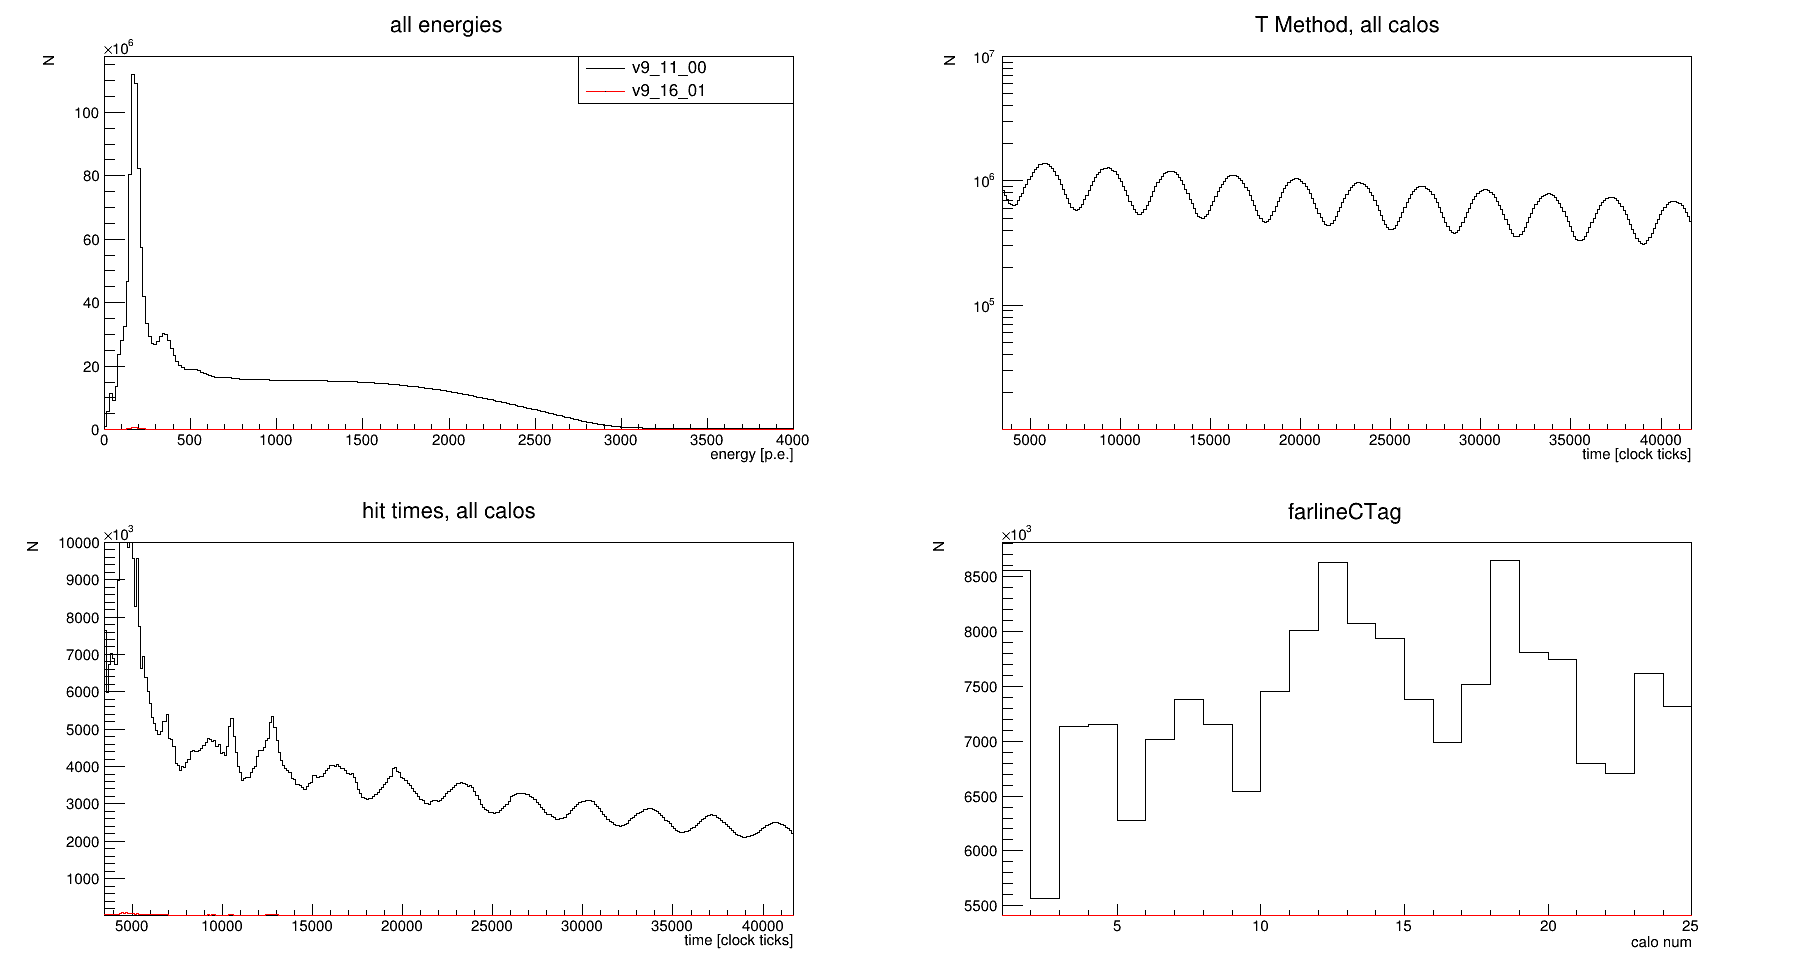

In [4]:
n = len(versionPaths)
c = r.TCanvas("cNew","cNew",1800,1000)
c.Divide(2,2)

c.cd(1)
leg = r.TLegend(0.65,0.8,0.9,0.9)
for version in range(n):
    histVec[version*4+0].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+0].Draw()
    else:
        histVec[version*4+0].Draw("SAME")
    leg.AddEntry(histVec[version*4+0],versionNumbers[version],"pl")
    print(versionNumbers[version])
leg.Draw()

c.cd(2)
r.gPad.SetLogy()
for version in range(n):
    histVec[version*4+1].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+1].Draw()
        histVec[version*4+1].GetYaxis().SetRangeUser(10000,10000000)
    else:
        histVec[version*4+1].Draw("SAME")

c.cd(3)
for version in range(n):
    histVec[version*4+2].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+2].Draw()
        histVec[version*4+2].GetYaxis().SetRangeUser(10000,10000000)
    else:
        histVec[version*4+2].Draw("SAME")

c.cd(4)
for version in range(n):
    histVec[version*4+3].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+3].Draw()
    else:
        histVec[version*4+3].Draw("SAME")
    
    
c.Draw()

Now let's compare the 5 parameter fits for all of the calos

./images/v9_11_00/
[<ROOT.TKey object ("c1") at 0x7fffefbc0270>]
[<ROOT.TFrame object ("TFrame") at 0x7fffefd64360>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffefe35270>, <ROOT.TPaveText object ("title") at 0x7fffeb9208a0>, <ROOT.TPad object ("upper_pad") at 0x7fffeb91e780>, <ROOT.TPad object ("lower_pad") at 0x7fffeb91ccf0>, <ROOT.TPad object ("top_pad") at 0x7fffeb8b3750>, <ROOT.TRatioPlot object ("TRatioPlot") at 0x7fffeb8b7270>]
./images/v9_16_01/
[<ROOT.TKey object ("c1") at 0x7fffefd7ef50>]
[<ROOT.TFrame object ("TFrame") at 0x7fffef86ee90>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffefd80790>, <ROOT.TPaveText object ("title") at 0x7fffefd80dc0>, <ROOT.TPad object ("upper_pad") at 0x7fffefe346e0>, <ROOT.TPad object ("lower_pad") at 0x7fffefdcbaf0>, <ROOT.TPad object ("top_pad") at 0x7fffefe270c0>, <ROOT.TRatioPlot object ("TRatioPlot") at 0x7fffefe27af0>]
[<ROOT.TH1D object ("allCaloWiggle") at 0x7fffefd8f0f0>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffefba60b0>]
TFile**		

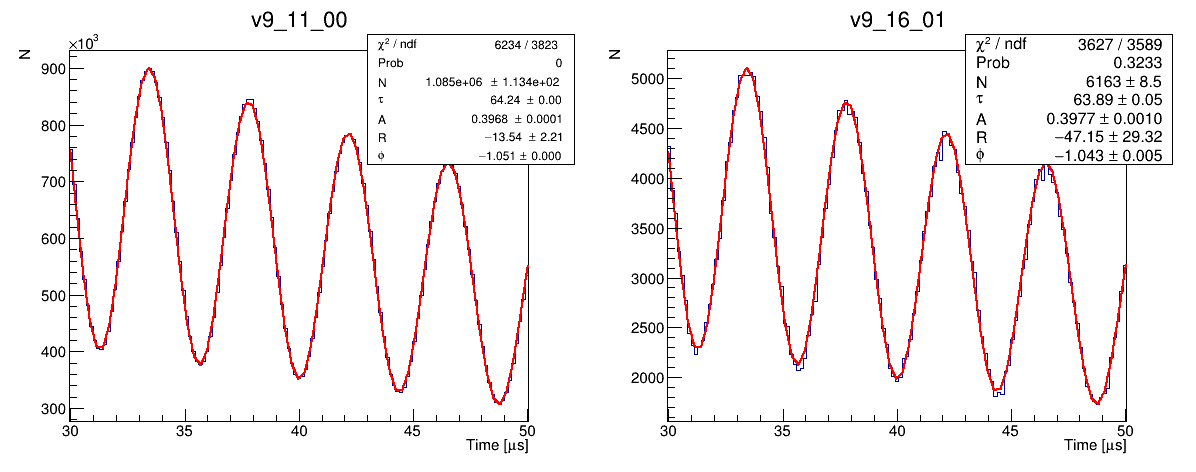

In [5]:
c4 = r.TCanvas("c4","c4",1200,500)
c4.Divide(int(len(versionPaths)),1)

histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_TmethodWiggleFitAllCalos.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    pad = prims[1].Clone()
    pad.SetDirectory(0)
    histVec.append(pad)
    
print(histVec)
    
for i in range(len(versionNumbers)):
    histVec[i].SetTitle(versionNumbers[i])
    c4.cd(i+1)
    histVec[i].Draw()
    
    
c4.Draw()

And the residuals

./images/v9_11_00/
[<ROOT.TKey object ("c1") at 0x7fffef4f4420>]
[<ROOT.TFrame object ("TFrame") at 0x7fffefe26fe0>, <ROOT.TH1D object ("out_MAG P") at 0x7fffefdb8720>, <ROOT.TPaveText object ("title") at 0x7fffefeed7a0>]
./images/v9_16_01/
[<ROOT.TKey object ("c1") at 0x7fffefda6e80>]
[<ROOT.TFrame object ("TFrame") at 0x7fffefb38e20>, <ROOT.TH1D object ("out_MAG P") at 0x7fffefd8f0f0>, <ROOT.TPaveText object ("title") at 0x7fffefba5f00>]
[<ROOT.TH1D object ("out_MAG P") at 0x7fffefe26230>, <ROOT.TH1D object ("out_MAG P") at 0x7fffefefb0a0>]
TFile**		./images/v9_11_00/v9_11_00_5ParamResiduals.root	
 TFile*		./images/v9_11_00/v9_11_00_5ParamResiduals.root	
  KEY: TCanvas	c1;1	c1
TFile**		./images/v9_16_01/v9_16_01_5ParamResiduals.root	
 TFile*		./images/v9_16_01/v9_16_01_5ParamResiduals.root	
  KEY: TCanvas	c1;1	c1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::SaveAs>: ROOT file hi.root has been created


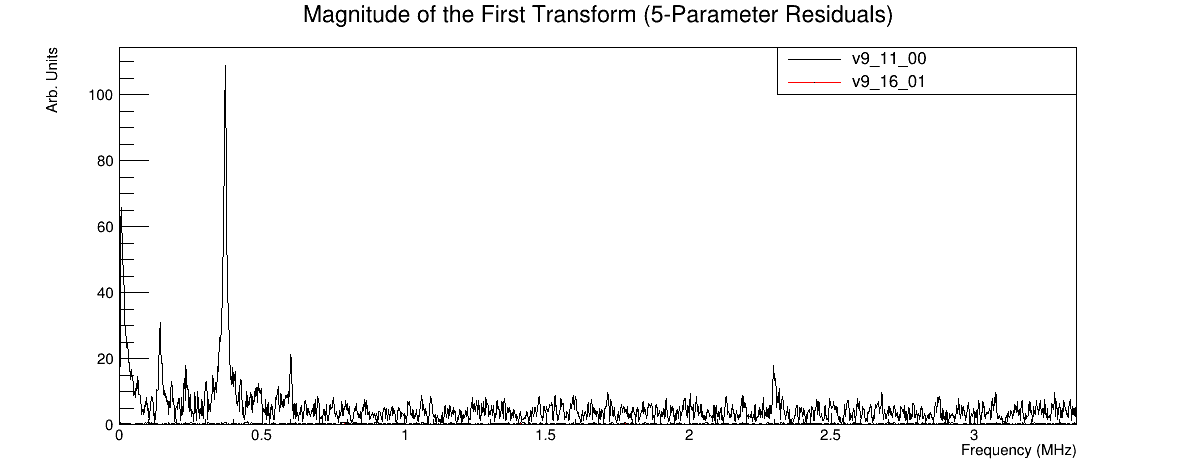

In [6]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_5ParamResiduals.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    hist = prims[1].Clone()
    hist.SetDirectory(0)
    histVec.append(hist)
   

c4 = r.TCanvas("c4","c4",1200,500)
leg = r.TLegend(0.65,0.8,0.9,0.9)
print(histVec)
for i, hist in enumerate(histVec):
    
    hist.SetLineColor(i+1)
    
    if i < 0.5:
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    leg.AddEntry(hist,versionNumbers[i],"pl")

leg.Draw()
#c4.SetLogy()
c4.Draw()
c4.Print("hi.root")

And now let's do the same for the 13-parameter fits

./images/v9_11_00/
[<ROOT.TKey object ("c3") at 0x7fffefaff280>]
[<ROOT.TFrame object ("TFrame") at 0x7fffefeed1e0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffeff5c470>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffefda8ca0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffefb9d8b0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffefe26230>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffefdb8cb0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffbb0e50>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffbb12b0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffefef5680>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffefef5ae0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffbb04f0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffbb0980>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffbd34b0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffbd3970>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffba0f00>, <ROOT.TH1D object ("laserSyncEnergies") at 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


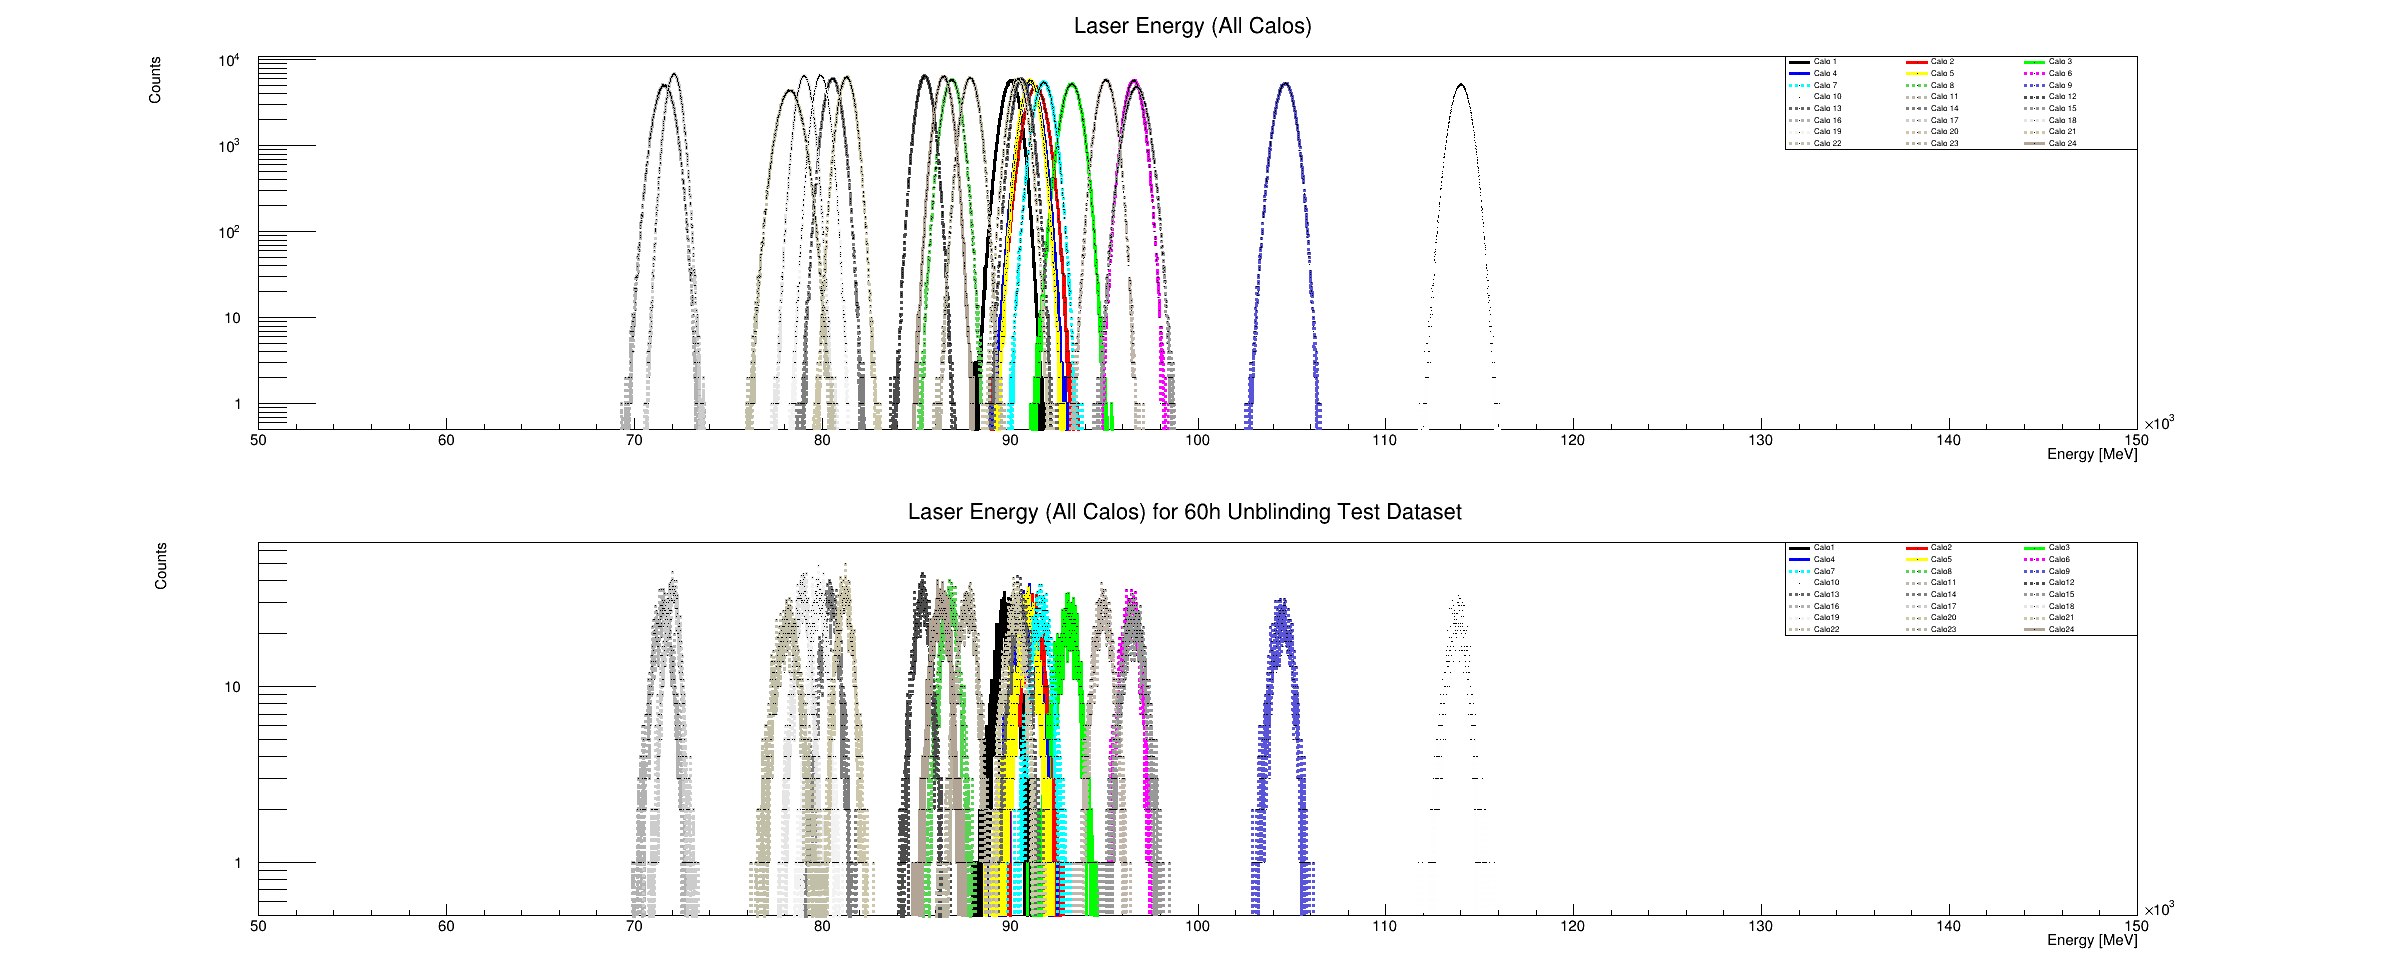

In [7]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_laserEnergyPulse_allcalo.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    for x in prims:
        if(str(type(x)) == "<class 'ROOT.TH1D'>"):
            hist = x.Clone()
            hist.SetDirectory(0)
            histVec.append(hist)
   

c4 = r.TCanvas("c4","c4",2400,1000)
c4.Divide(1,2)
c4.cd(0)
leg = r.TLegend(0.75,0.7,0.9,0.9)
leg.SetNColumns(3)
c4.cd(2)
leg2 = r.TLegend(0.75,0.7,0.9,0.9)
leg2.SetNColumns(3)

print(histVec)
for i, hist in enumerate(histVec):
    
    if i < 24:
        c4.cd(1)
        r.gPad.SetLogy()
        hist.SetLineColor(i+1)
    else:
        c4.cd(2)
        r.gPad.SetLogy()
        hist.SetLineColor((i-24)+1)
    
    if i < 0.5:
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    if i < 24:
        leg.AddEntry(hist,"Calo "+str(i+1),"pl")
    else:
        leg2.AddEntry(hist,"Calo"+str(i-24+1),"pl")

c4.cd(1)     
leg.Draw()
c4.cd(2)
leg2.Draw()
c4.Draw()

./images/v9_11_00/
[<ROOT.TKey object ("c3") at 0x7f01ffbcf7f0>]
[<ROOT.TFrame object ("TFrame") at 0x7fffefda67e0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffefefb050>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffbc5020>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffdacb30>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffba3a90>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffbd2e90>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffeff45260>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffbc6a20>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff0014a50>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffeff750e0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffbc8110>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffbc46c0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffbc4b80>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffeff45ef0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffeff463b0>, <ROOT.TH1D object ("laserSyncEnergies") at 

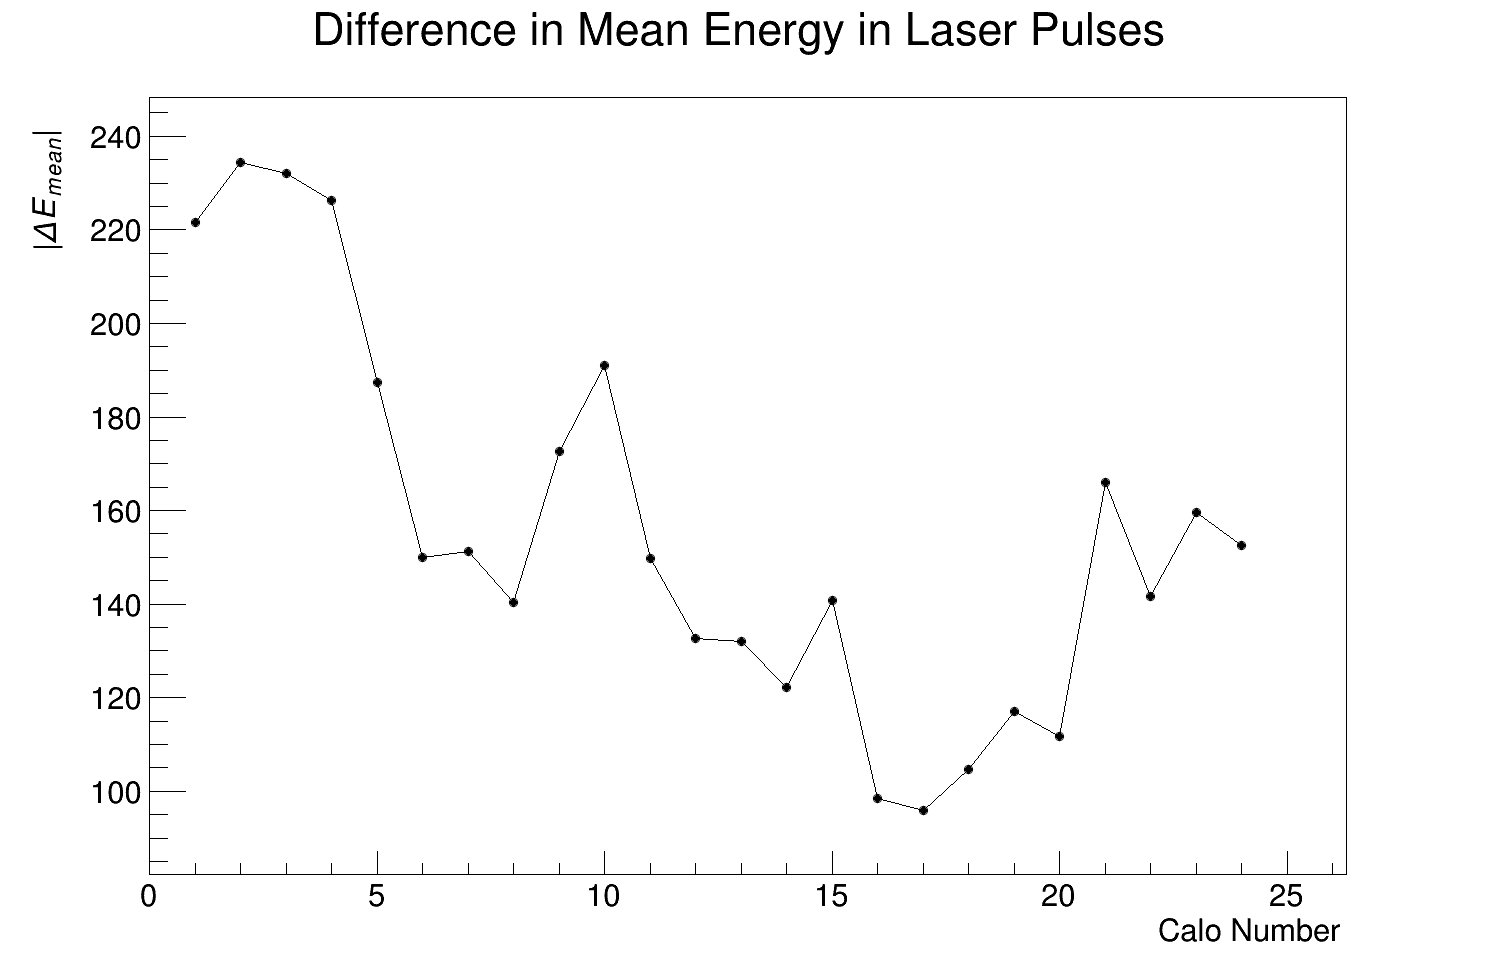

In [8]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_laserEnergyPulse_allcalo.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    for x in prims:
        if(str(type(x)) == "<class 'ROOT.TH1D'>"):
            hist = x.Clone()
            hist.SetDirectory(0)
            histVec.append(hist)
   

c5 = r.TCanvas("c5","c5",1500,1000)
leg = r.TLegend(0.75,0.7,0.9,0.9)
leg.SetNColumns(3)

print(histVec)

gr = r.TGraph()

for i in range(len(histVec)):
    if(i == 24):
        break
    h1 = histVec[i].Clone()
    h2 = histVec[i+24].Clone()
    
    diffMean = r.TMath.Abs(h1.GetMean() - h2.GetMean())
    
    gr.SetPoint(i, i+1, diffMean)
    
gr.SetTitle("Difference in Mean Energy in Laser Pulses")
gr.GetXaxis().SetTitle("Calo Number")
gr.GetYaxis().SetTitle("$ | \Delta E_{mean} | $")
gr.SetMarkerStyle(8)
gr.Draw("apl")
c5.Draw()

./images/v9_11_00/
[<ROOT.TKey object ("c3") at 0x7f01fdc19600>]
[<ROOT.TFrame object ("TFrame") at 0x7f01fdd70150>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01ffd62a10>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01fdd40350>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01fdd3c710>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01fdc1b570>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01fdc1b9d0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01fdd7af90>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01fdd7b3f0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01fdd40a80>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01fdd40f40>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01fdd76a60>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01fdd76f20>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01fdcc3c60>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01fdcc40f0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7f01fdcc4580>, <ROOT.TH1D object ("laserSyncEnergies") at 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


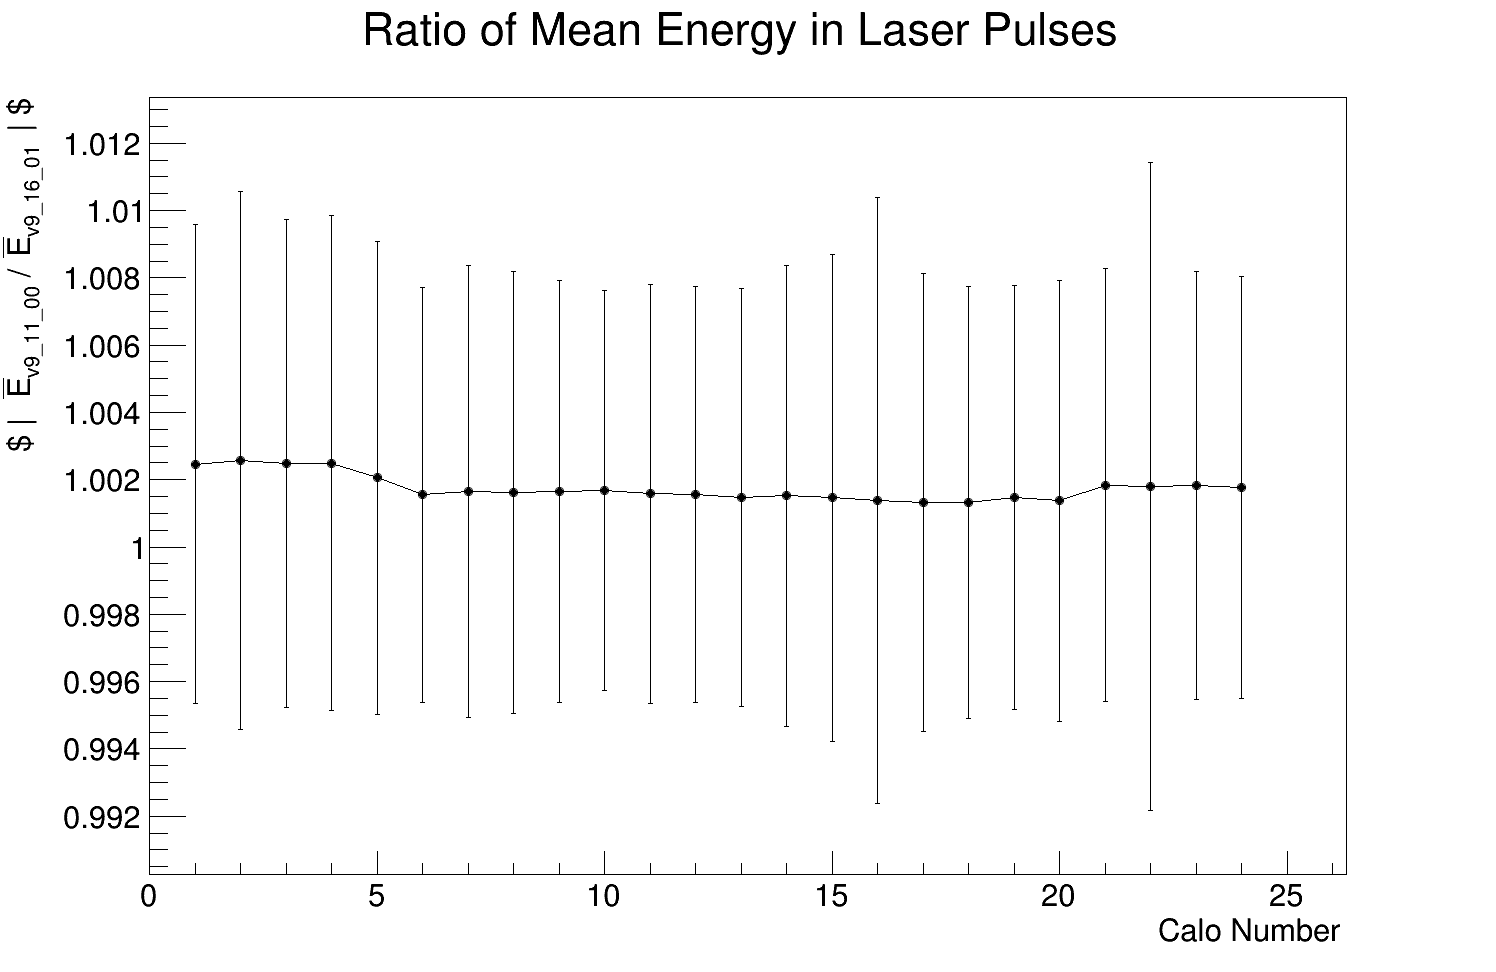

In [15]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_laserEnergyPulse_allcalo.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    for x in prims:
        if(str(type(x)) == "<class 'ROOT.TH1D'>"):
            hist = x.Clone()
            hist.SetDirectory(0)
            histVec.append(hist)
   

c5 = r.TCanvas("c5","c5",1500,1000)
leg = r.TLegend(0.75,0.7,0.9,0.9)
leg.SetNColumns(3)

print(histVec)

gr = r.TGraphErrors()

for i in range(len(histVec)):
    if(i == 24):
        break
    h1 = histVec[i].Clone()
    h2 = histVec[i+24].Clone()
    
    diffMean = r.TMath.Abs(h1.GetMean() / h2.GetMean())
    diffErr = r.TMath.Sqrt((h1.GetStdDev()/h1.GetMean())**2 + (h2.GetStdDev()/h2.GetMean())**2 )
    
    gr.SetPoint(i, i+1, diffMean)
    gr.SetPointError(i, 0, diffErr)
    
gr.SetTitle("Ratio of Mean Energy in Laser Pulses")
gr.GetXaxis().SetTitle("Calo Number")
gr.GetYaxis().SetTitle("$ |  #bar{E}_{"+versionNumbers[0]+"} / #bar{E}_{"+versionNumbers[1]+"}  | $")
gr.SetMarkerStyle(8)
gr.Draw("apl")

#gr.GetYaxis().SetRangeUser(0.75,1.25)

c5.Draw()

In [10]:
histVec = []
calo = 23
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    #./images/v9_16_01/v9_16_01_energySpectrum_calo01.root
    f = r.TFile(versionPath+versionNumbers[i]+"_energySpectrum_calo"+str(calo).zfill(2)+".root")
    #f.ls()
    keys = list(f.GetListOfKeys())
    #print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    #print(prims)
    
    for x in prims:
        keys2 = list(x.GetListOfPrimitives())
        #print(keys2)
        for y in keys2:
            #print(y)
            #print(y.GetName())
            #z = c.GetPrimitive(y.GetName())
            #print(type(z))
            if(str(type(y)) == "<class 'ROOT.TH1D'>"):
                hist = y.Clone()
                hist.SetDirectory(0)
                histVec.append(hist)
                
print(histVec)

./images/v9_11_00/
./images/v9_16_01/
[<ROOT.TH1D object ("calo23TimeCut0Energy") at 0x7f01fdd10520>, <ROOT.TH1D object ("calo23TimeCut1Energy") at 0x7f01fdcac4c0>, <ROOT.TH1D object ("calo23TimeCut2Energy") at 0x7f01fdd12f40>, <ROOT.TH1D object ("calo23TimeCut3Energy") at 0x7f01fdc5c160>, <ROOT.TH1D object ("calo23TimeCut4Energy") at 0x7f01fdc5c550>, <ROOT.TH1D object ("calo23TimeCut5Energy") at 0x7f01fdc5c940>, <ROOT.TH1D object ("calo23TimeCut6Energy") at 0x7f01fdcc4ac0>, <ROOT.TH1D object ("calo23TimeCut7Energy") at 0x7f01fdcc6190>, <ROOT.TH1D object ("calo23TimeCut8Energy") at 0x7f01fdcc65f0>, <ROOT.TH1D object ("calo23TimeCut9Energy") at 0x7f01fdee8fd0>, <ROOT.TH1D object ("calo23TimeCut10Energy") at 0x7f01fdeeba30>, <ROOT.TH1D object ("calo23TimeCut11Energy") at 0x7f01fdeee550>, <ROOT.TH1D object ("calo23TimeCut12Energy") at 0x7f01fdef1080>, <ROOT.TH1D object ("calo23TimeCut13Energy") at 0x7f01fdef28c0>, <ROOT.TH1D object ("calo23TimeCut14Energy") at 0x7f01fdef2e20>, <ROOT.TH1D 

<ROOT.TH1D object ("calo23TimeCut0Energy") at 0x7f01fdd10520> <ROOT.TH1D object ("calo23TimeCut0Energy") at 0x7f01ffd65a90>
<ROOT.TH1D object ("calo23TimeCut1Energy") at 0x7f01fdcac4c0> <ROOT.TH1D object ("calo23TimeCut1Energy") at 0x7f01ffd684b0>
<ROOT.TH1D object ("calo23TimeCut2Energy") at 0x7f01fdd12f40> <ROOT.TH1D object ("calo23TimeCut2Energy") at 0x7f01ffd6af80>
<ROOT.TH1D object ("calo23TimeCut3Energy") at 0x7f01fdc5c160> <ROOT.TH1D object ("calo23TimeCut3Energy") at 0x7f01ffd6d9a0>
<ROOT.TH1D object ("calo23TimeCut4Energy") at 0x7f01fdc5c550> <ROOT.TH1D object ("calo23TimeCut4Energy") at 0x7f01ffd703f0>
<ROOT.TH1D object ("calo23TimeCut5Energy") at 0x7f01fdc5c940> <ROOT.TH1D object ("calo23TimeCut5Energy") at 0x7f01fdd212f0>
<ROOT.TH1D object ("calo23TimeCut6Energy") at 0x7f01fdcc4ac0> <ROOT.TH1D object ("calo23TimeCut6Energy") at 0x7f01fdd23d70>
<ROOT.TH1D object ("calo23TimeCut7Energy") at 0x7f01fdcc6190> <ROOT.TH1D object ("calo23TimeCut7Energy") at 0x7f01fdd267c0>
<ROOT.TH

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


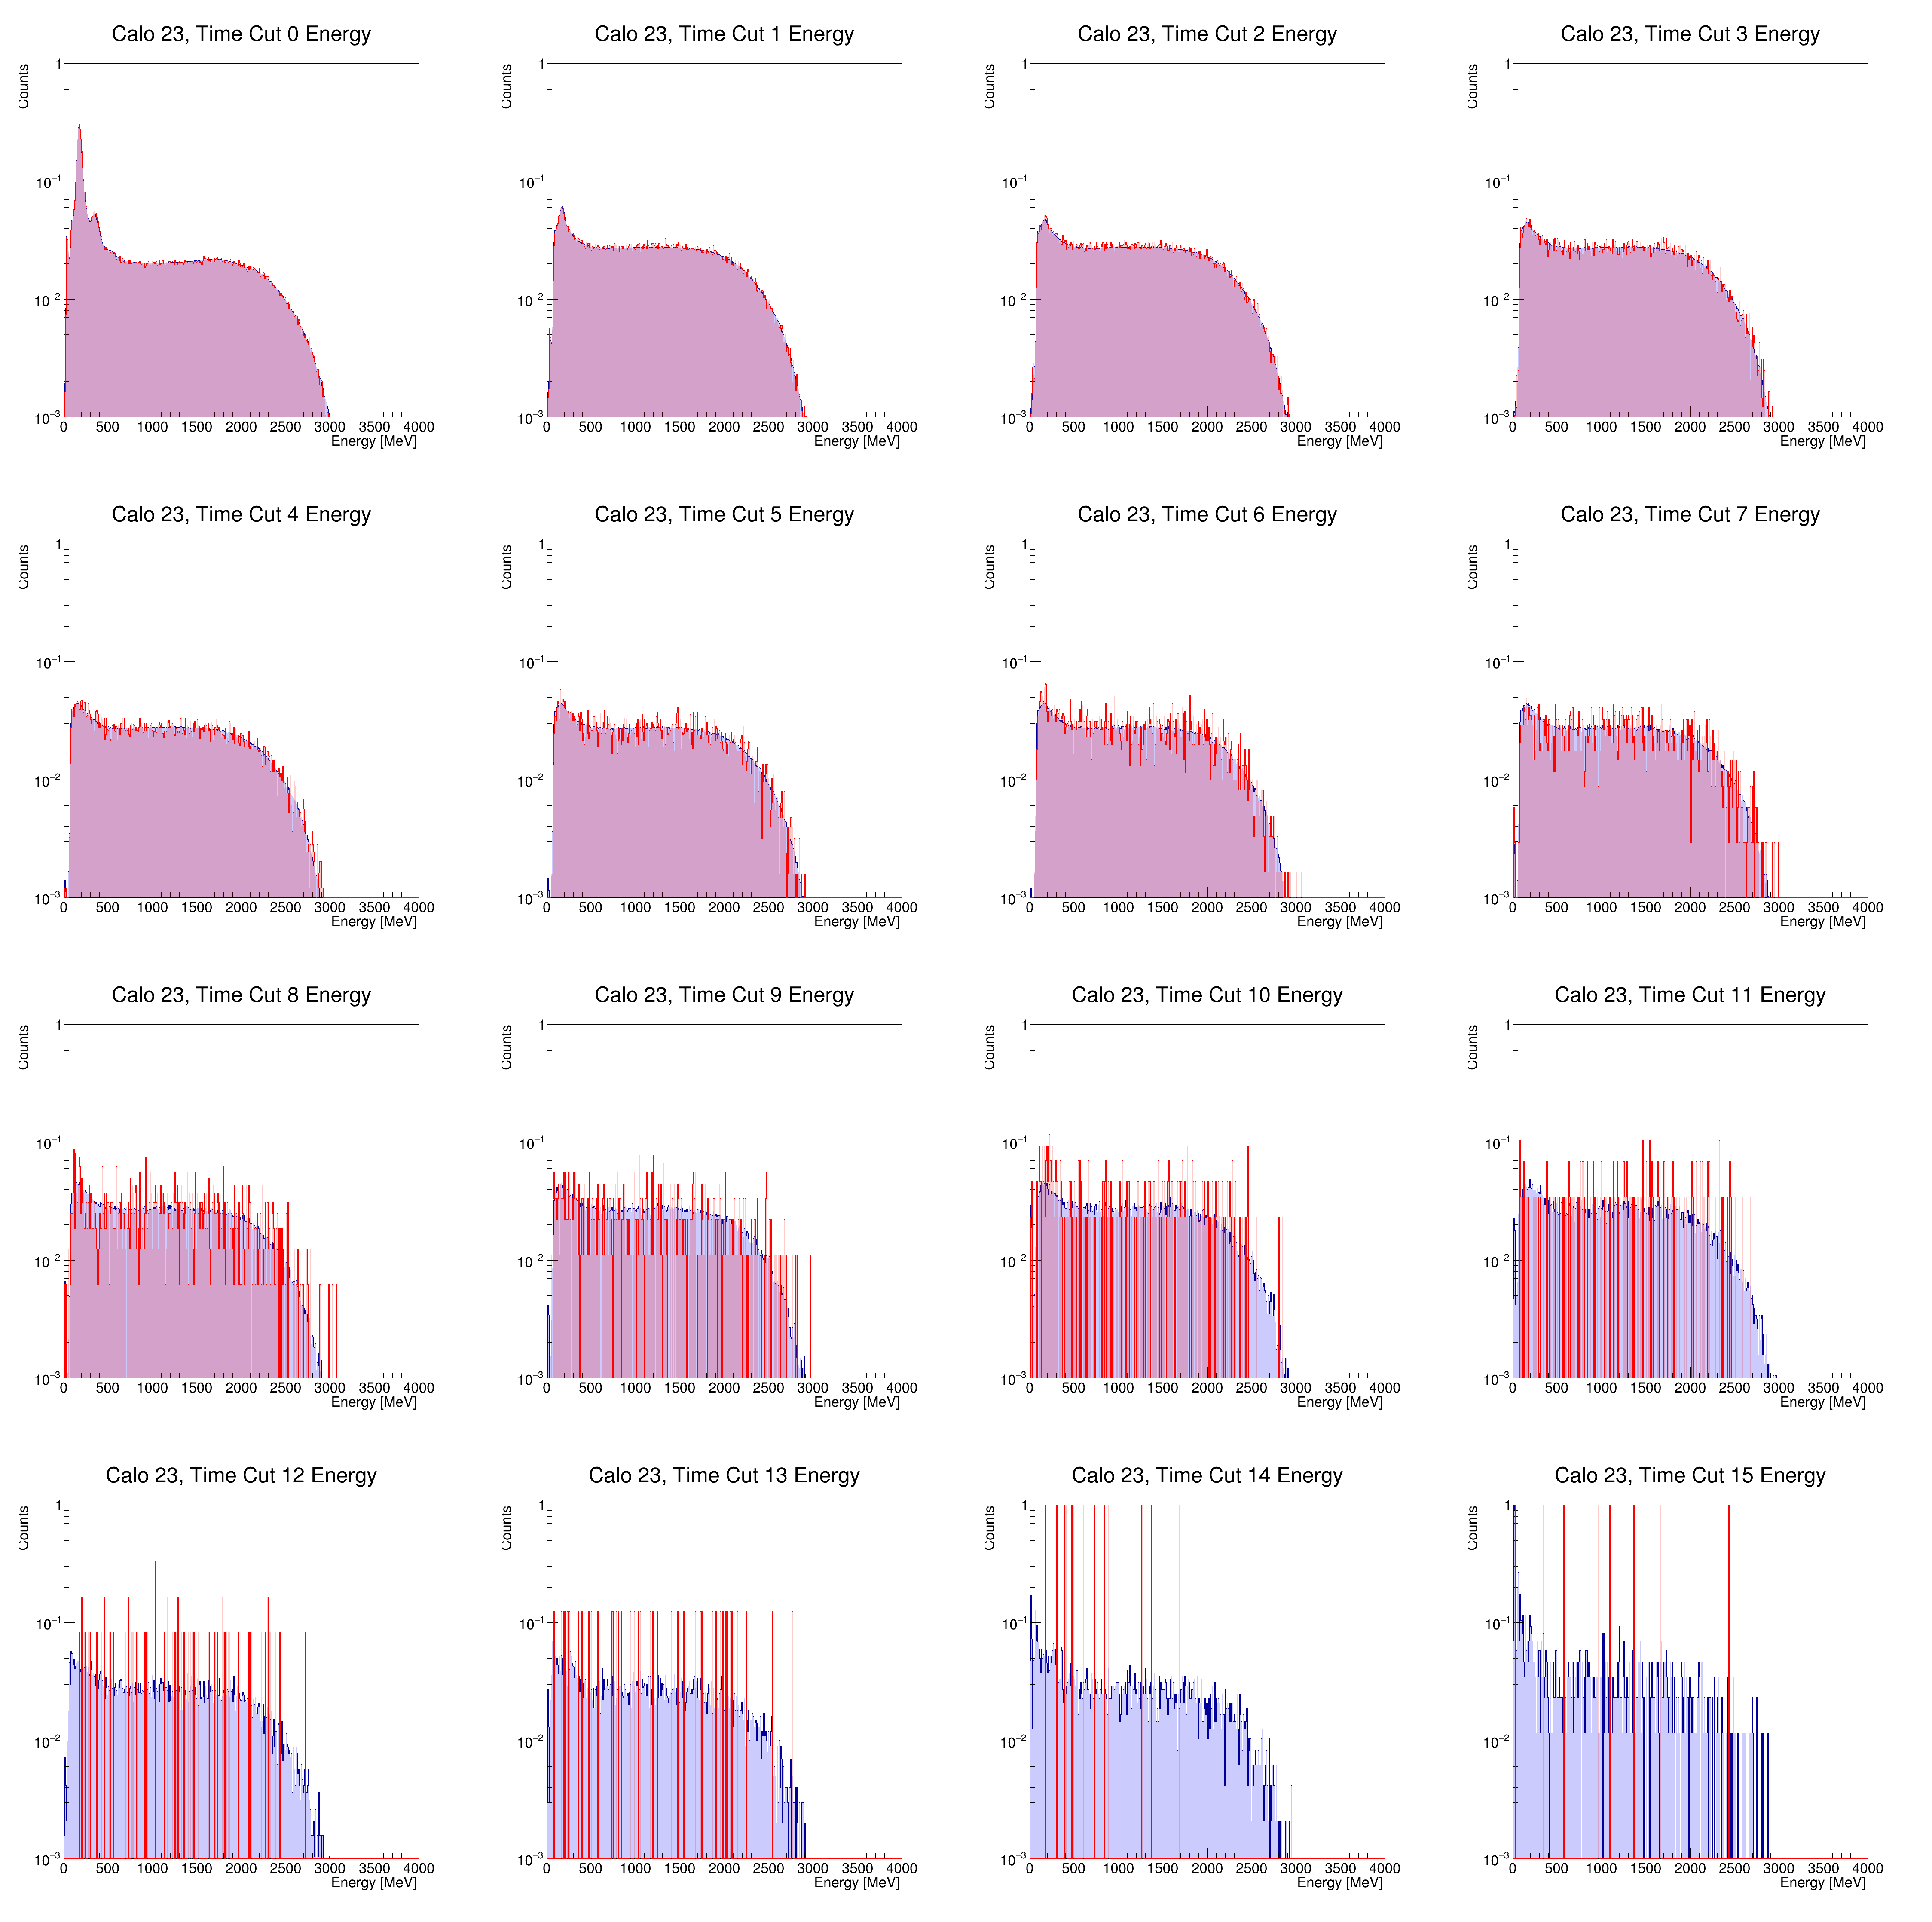

In [11]:
c5 = r.TCanvas("c5","c5",4500,4500)
leg = r.TLegend(0.75,0.7,0.9,0.9)
leg.SetNColumns(3)

c5.Divide(4,4)

for i in range(int(np.floor(len(histVec)/2))):
    c5.cd(i+1)
    histVec[i].Draw("HIST")
    histVec[i].SetFillColorAlpha(4,0.2)
    
    print(histVec[i], histVec[i+int(np.floor(len(histVec)/2))])
    
    histVec[i+int(np.floor(len(histVec)/2))].SetLineColor(2)
    histVec[i+int(np.floor(len(histVec)/2))].SetFillColorAlpha(2,0.2)
    histVec[i+int(np.floor(len(histVec)/2))].Draw("HIST SAME")
    
    r.gPad.SetLogy()    
c5.Draw()